<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("../DATA/housing.data", header=None, names=names, delim_whitespace=True)

In [3]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

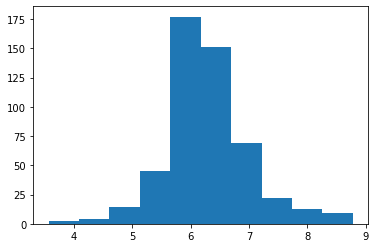

In [5]:
#  ANSWER
plt.hist(data['RM']);

##### 2. Plot Histogram of `MEDV`

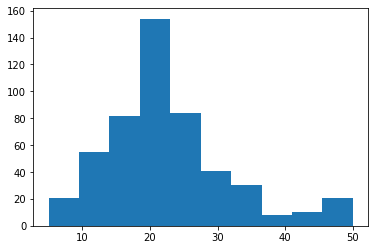

In [6]:
# ANSWER
plt.hist(data['MEDV']);

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

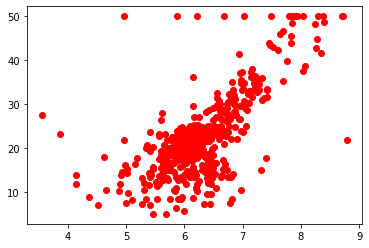

In [7]:
# ANSWER
plt.scatter(data['RM'],data['MEDV'], c='red')

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [8]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [9]:
#rslt_df = dataframe[dataframe['Percentage'] > 80]
N = 100
largehouse = data[data['RM'] > 6].sample(N)
smallhouse = data[data['RM'] <= 6].sample(N)
largehouse

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241.0,18.2,341.60,12.93,20.1
448,9.32909,0.0,18.10,0,0.713,6.185,98.7,2.2616,24,666.0,20.2,396.90,18.13,14.1
302,0.09266,34.0,6.09,0,0.433,6.495,18.4,5.4917,7,329.0,16.1,383.61,8.67,26.4
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
232,0.57529,0.0,6.20,0,0.507,8.337,73.3,3.8384,8,307.0,17.4,385.91,2.47,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.03871,52.5,5.32,0,0.405,6.209,31.3,7.3172,6,293.0,16.6,396.90,7.14,23.2
275,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254.0,17.6,396.90,2.98,32.0
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,18.6
381,15.87440,0.0,18.10,0,0.671,6.545,99.1,1.5192,24,666.0,20.2,396.90,21.08,10.9


In [10]:
smallhouse

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
372,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0
212,0.21719,0.0,10.59,1,0.489,5.807,53.8,3.6526,4,277.0,18.6,390.94,16.03,22.4
24,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
339,0.05497,0.0,5.19,0,0.515,5.985,45.4,4.8122,5,224.0,20.2,396.90,9.74,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403.0,14.7,292.29,14.43,17.4
456,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666.0,20.2,10.48,19.01,12.7
36,0.09744,0.0,5.96,0,0.499,5.841,61.4,3.3779,5,279.0,19.2,377.56,11.41,20.0


##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

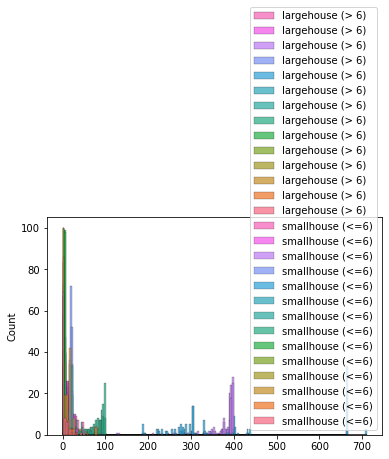

In [11]:
# ANSWER
sns.histplot(data=largehouse, color="skyblue", label="largehouse (> 6)", kde=False)
sns.histplot(data=smallhouse, color="red", label="smallhouse (<=6)", kde=False)

plt.legend() 
plt.show()

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


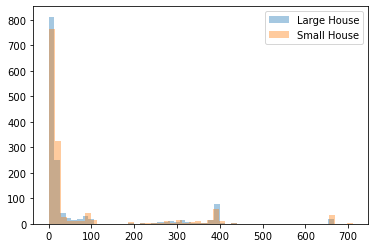

In [12]:
ax = sns.distplot(largehouse, label='Large House', kde=False);
sns.distplot(smallhouse, ax=ax, label='Small House', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

##### 7. Calculate Variance

Calculate variance for both samples.

In [13]:
# ANSWER
largehouse.var()

CRIM          98.252128
ZN           537.832803
INDUS         39.152420
CHAS           0.065758
NOX            0.010331
RM             0.355415
AGE          765.561681
DIS            4.120277
RAD           60.811717
TAX        22436.526364
PTRATIO        4.425822
B           7749.650685
LSTAT         27.815306
MEDV          84.487358
dtype: float64

In [22]:
smallhouse.var()

CRIM          83.202073
ZN           304.362904
INDUS         49.076232
CHAS           0.065758
NOX            0.014486
RM             0.220891
AGE          723.843208
DIS            4.849822
RAD           88.305455
TAX        33217.056970
PTRATIO        3.989789
B           9588.521975
LSTAT         60.561225
MEDV          42.896827
dtype: float64

In [14]:
largehouse.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241.0,18.2,341.60,12.93,20.1
448,9.32909,0.0,18.10,0,0.713,6.185,98.7,2.2616,24,666.0,20.2,396.90,18.13,14.1
302,0.09266,34.0,6.09,0,0.433,6.495,18.4,5.4917,7,329.0,16.1,383.61,8.67,26.4
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
232,0.57529,0.0,6.20,0,0.507,8.337,73.3,3.8384,8,307.0,17.4,385.91,2.47,41.7


In [15]:
large_var = np.var(largehouse,ddof=1)
small_var = np.var(smallhouse,ddof=1)

In [16]:
smallhouse.var()

CRIM          83.202073
ZN           304.362904
INDUS         49.076232
CHAS           0.065758
NOX            0.014486
RM             0.220891
AGE          723.843208
DIS            4.849822
RAD           88.305455
TAX        33217.056970
PTRATIO        3.989789
B           9588.521975
LSTAT         60.561225
MEDV          42.896827
dtype: float64

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [17]:
# ANSWER
largehouse.std()

CRIM         9.912221
ZN          23.191223
INDUS        6.257189
CHAS         0.256432
NOX          0.101640
RM           0.596167
AGE         27.668785
DIS          2.029846
RAD          7.798187
TAX        149.788272
PTRATIO      2.103764
B           88.032100
LSTAT        5.274022
MEDV         9.191700
dtype: float64

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [24]:
t = (np.mean(largehouse) - np.mean(smallhouse))/(data['MEDV']*np.sqrt(2/N))

In [19]:
t

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-2759.042607,3.020917,-14.193562,NaN,-0.782010,1.090676,-1.266285,1.371087,-16.546299,-1.511441,-0.463548,0.323333,-11.513061,2.170523
1,-638.489538,inf,-4.637500,NaN,-0.897061,1.116834,-1.046410,1.128978,-8.273149,-1.848704,-0.398443,0.323333,-6.272981,2.411692
2,-638.957467,inf,-4.637500,NaN,-0.897061,0.998079,-1.351257,1.128978,-8.273149,-1.848704,-0.398443,0.326683,-14.227059,1.501226
3,-538.682400,inf,-15.039967,NaN,-0.918606,1.024749,-1.802659,0.925035,-5.515433,-2.015254,-0.379266,0.325192,-19.501716,1.559657
4,-252.529316,inf,-15.039967,NaN,-0.918606,1.003385,-1.523280,0.925035,-5.515433,-2.015254,-0.379266,0.323333,-10.757044,1.439021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-278.415285,inf,-2.748292,NaN,-0.734243,1.087698,-1.194816,2.262465,-16.546299,-1.638778,-0.337728,0.327383,-5.929167,2.325561
502,-385.181119,inf,-2.748292,NaN,-0.734243,1.171764,-1.076425,2.451474,-16.546299,-1.638778,-0.337728,0.323333,-6.314432,2.528765
503,-286.984024,inf,-2.748292,NaN,-0.734243,1.027981,-0.907272,2.587195,-16.546299,-1.638778,-0.337728,0.323333,-10.165788,2.179605
504,-159.112595,inf,-2.748292,NaN,-0.734243,1.055519,-0.924544,2.347418,-16.546299,-1.638778,-0.337728,0.326168,-8.848001,2.367843


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [23]:
# ANSWER
dof = len(smallhouse) + len(largehouse) - 2
dof

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [25]:
# ANSWER
stats.t.cdf
p_value = 1-cdf(t)

NameError: name 'cdf' is not defined

In [ ]:
# ANSWER

In [ ]:
# ANSWER

In [ ]:
# ANSWER

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [ ]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



